In [ ]:
print('Welcome to Google Colab')

Welcome to Google Colab


# Basic Linux/Shell commands
More details on this can be found [here](https://missing.csail.mit.edu/2020/shell-tools/).



In [ ]:
!date

Mon Feb  8 02:50:07 UTC 2021


In [ ]:
! ls

mnt  notebooks	sample_data  tempdir


In [ ]:
! mkdir tempdir 
! ls

mkdir: cannot create directory ‘tempdir’: File exists
mnt  notebooks	sample_data  tempdir


# Python packages

In [ ]:
!pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
appdirs                       1.4.4          
argon2-cffi                   20.1.0         
asgiref                       3.3.1          
astor                         0.8.1          
astropy                       4.1            
astunparse                    1.6.3          
async-generator               1.10           
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.3.0         
audioread                     2.1.9          
autograd                      1.3            
Babel                         2.9.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.3.

In [1]:
! pip install trimesh

     |████████████████████████████████| 634kB 7.6MB/s 


In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [19]:
!ls /content/mnt/MyDrive/Colab\ Notebooks/

 01IntroDataPreparation.ipynb   Untitled	 'Untitled (2)'
 Elephant.png		        Untitled0.ipynb   Untitled2.ipynb
 lung.PNG		       'Untitled (1)'
 sample_weather.txt	        Untitled1.ipynb


`! pip install package_name # *should* install any package not available`

# Python Intro

## Data Types and Operators

In [ ]:
a = [1,2,3,4]
b = (1,2,3,4)
c = {'key1':1, 'key2':2}
d = [1,1,2,3,4,5,4]
e = set(d)
print(e)

{1, 2, 3, 4, 5}


In [ ]:
l = []
for i in range(100):
    l.append(i)

a = list(range(100))

%timeit
a = [i for i in range(100)]

## Classes

In [ ]:
class A(object):
    def __init__(self, a):
        self.a = a
        pass
    def __str__(self):
        pass
    
    def __repr__(self):
        pass
    
    def __len__(self):
        pass

    def method1(self, arg1, arg2):
        print(self.a)


In [ ]:
obji = A(10)

In [ ]:
obji.method1(2,3)

10


## Important Python Packages

In [4]:
import os

In [5]:
import numpy as np
import scipy

x = np.array([1,2,3])
print(x[0].dtype)
print(type(1))

x = np.arange(10)
print(x)

int64
<class 'int'>
[0 1 2 3 4 5 6 7 8 9]


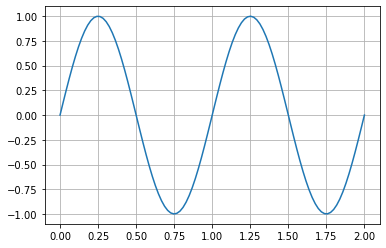

In [6]:
import matplotlib.pyplot as plt

t = np.linspace(0,2,100)
x = np.sin(2*np.pi*t)

plt.plot(t,x)
plt.grid()
plt.show()

In [7]:
import PIL

(257, 1130, 3)


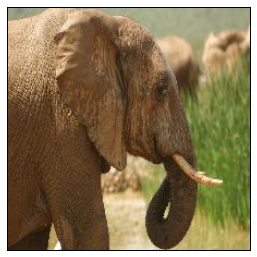

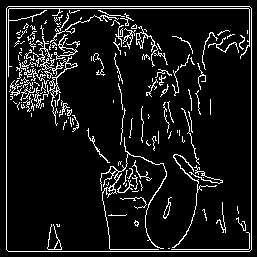

In [9]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/mnt/MyDrive/Colab Notebooks/Elephant.png')
print(img.shape)
edges = cv2.Canny(img[:,:257,:],100,200)
cv2_imshow(img[:,:257,:])
cv2_imshow(edges)

# Images

## Loading an Image

In [10]:
img = cv2.imread('/content/mnt/MyDrive/Colab Notebooks/lung.PNG',0)
print(img)


[[  9   9  11 ...  29  78 177]
 [ 13  13  16 ...  39  87 181]
 [ 15  14  17 ...  42  90 182]
 ...
 [ 45  64  77 ...  41  79 176]
 [ 49  70  83 ...  64  97 184]
 [ 85 129 154 ... 148 166 215]]


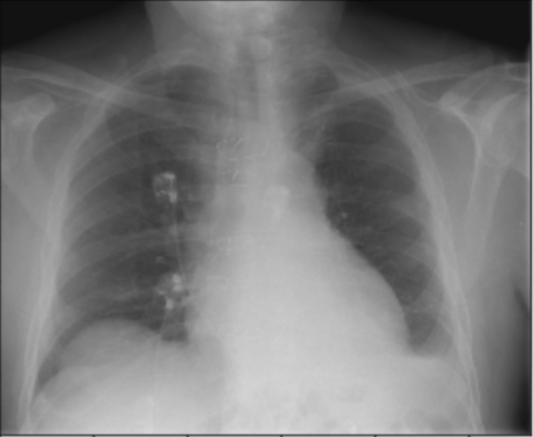

In [11]:
cv2_imshow(img)

## Histogram Equalization

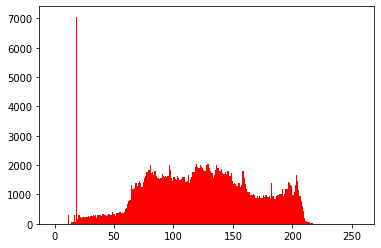

In [12]:
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')


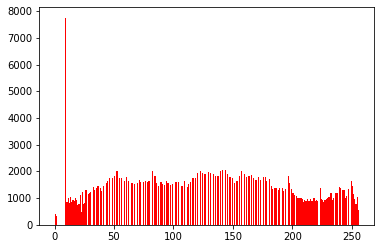

In [13]:
equ = cv2.equalizeHist(img)
_ = plt.hist(equ.flatten(),256,[0,256], color = 'r')

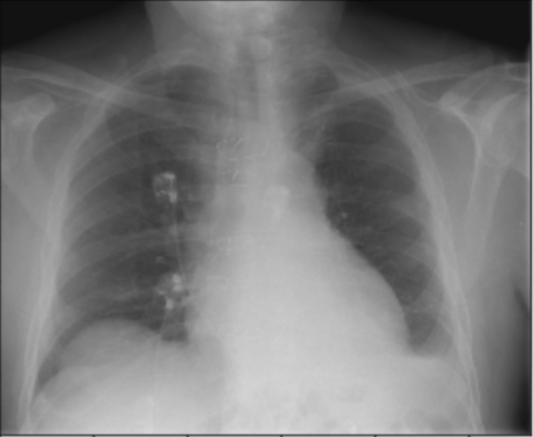

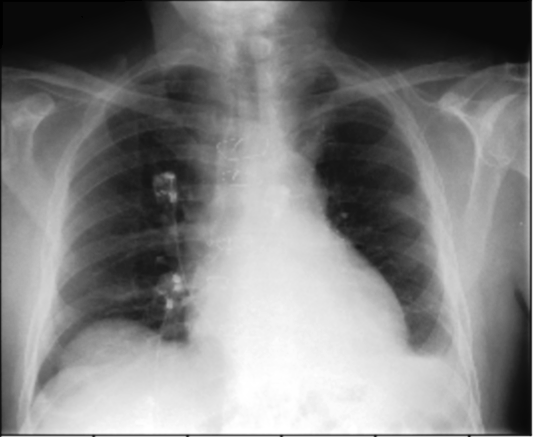

In [ ]:
cv2_imshow(img)
cv2_imshow(equ)

## Denoising

```
# This is formatted as code
```



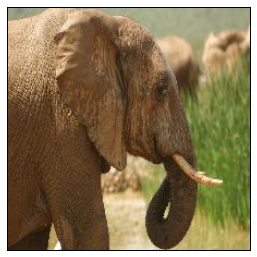

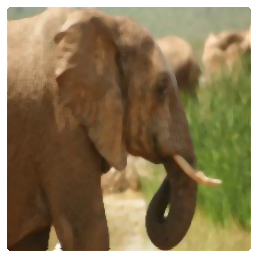

In [ ]:
img = cv2.imread('/content/mnt/MyDrive/Colab Notebooks/ME 592X/Elephant.png')[:,:257,:]
median = cv2.medianBlur(img,5)
cv2_imshow(img)
cv2_imshow(median)

More Details on different image processing operations can be found in:


1.   https://opencv-python-tutroals.readthedocs.io/en/latest/index.html
2.   https://scikit-image.org/docs/stable/auto_examples/index.html



#Time Series

In [15]:
import pandas as pd
timedata = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/sample_weather.txt')


In [ ]:
timedata

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [16]:
timedata_np = timedata.to_numpy()

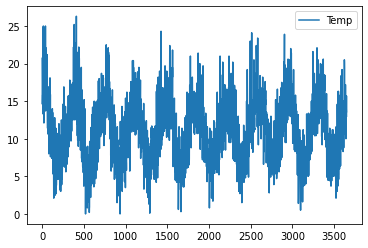

In [17]:
timedata.plot()

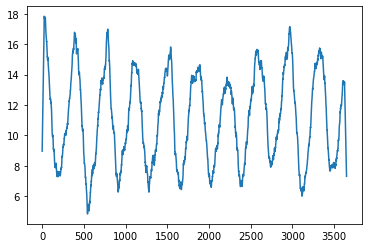

In [18]:
import scipy.signal
def apply_convolution(sig, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = scipy.signal.convolve(sig, conv, mode='same') / window
    return filtered

filtered = apply_convolution(timedata_np[:,1], 50)
plt.plot(filtered)

More details on time series processing can be found at 
1. https://docs.scipy.org/doc/scipy/reference/signal.html
2. https://dynamictimewarping.github.io/
3. https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html#
